# WeatherPy
----

#### Your objective is to build a series of scatter plots to showcase the following relationships:

- Temperature (F) vs. Latitude
- Humidity (%) vs. Latitude
- Cloudiness (%) vs. Latitude
- Wind Speed (mph) vs. Latitude


#### Your final notebook must:

Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
Perform a weather check on each of the cities using a series of successive API calls.
Include a print log of each city as it's being processed with the city number and city name.
Save both a CSV of all data retrieved and png images for each scatter plot.


#### As final considerations:

You must complete your analysis using a Jupyter notebook.
You must use the Matplotlib or Pandas plotting libraries.
You must include a written description of three observable trends based on the data.
You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
See Example Solution for a reference on expected format.

## Observable Trends

- As expected, our Latitude data is great to visualize temperature with temperatures rising within tropics and as we move closer to the equater. However our Latitude data shows little to no relationship with humidity, cloudiness, or wind speed in a city.

- Clouds and humidity appear mostly consistent across different cities. Cloudiness and humitidy is not dependant on latitude. 

- Additional data would need to be further analyzed to find any potential relationships between our weather data points.  Seasonal information would be cool to look into. And extreme weather events that occur during those seasons (i.e. Hurricane season in tropics -- impact on wind speed, humidity). Can humidity, temperature and cloudiness be a preditor of snow melt in artic or occurence of hurricanes in tropics?



In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
# Build query URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# Build list of city weather data
city_data = []

# Start counter 
record_count = 1

print(f"OpenWeatherMap API Data")
print(f"-----------------------------------")

# Loop through all cities in the list
for i, city in enumerate(cities):
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    print("Processing Record %s | %s" % (record_count, city))

    # Add to counter
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse JSON
        api_weather = requests.get(city_url).json()

        # Parse weather data points from API
        max_temp = api_weather["main"]["temp_max"]
        humidity = api_weather["main"]["humidity"]
        cloudy = api_weather["clouds"]["all"]
        wind = api_weather["wind"]["speed"]
        country = api_weather["sys"]["country"]
        date = api_weather["dt"]
        city_lat = api_weather["coord"]["lat"]
        city_long = api_weather["coord"]["lon"]
        
        # Create city list
        city_data.append({"City": city, 
                          "Max Temp": max_temp,
                          "Humidity": humidity,
                          "Cloudiness": cloudy,
                          "Wind Speed": wind,
                          "Country": country,
                          "Date": date,
                          "Lat": city_lat, 
                          "Lng": city_long})
        
         
        
    # Skip if no match found
    except:
        print("City not found. Skip to next city.")
        pass
              
# Indicate API Call is complete
print(f"-----------------------------------")
print("API Call is Complete      ")
print(f"-----------------------------------")

OpenWeatherMap API Data
-----------------------------------
Processing Record 1 | illoqqortoormiut
City not found. Skip to next city.
Processing Record 2 | hobart
Processing Record 3 | yellowknife
Processing Record 4 | atuona
Processing Record 5 | olafsvik
City not found. Skip to next city.
Processing Record 6 | grand river south east
City not found. Skip to next city.
Processing Record 7 | albany
Processing Record 8 | mataura
Processing Record 9 | tecpatan
Processing Record 10 | ayan
Processing Record 11 | banda aceh
Processing Record 12 | caravelas
Processing Record 13 | new norfolk
Processing Record 14 | ribeira grande
Processing Record 15 | saskylakh
Processing Record 16 | stefan cel mare
Processing Record 17 | rikitea
Processing Record 18 | port alfred
Processing Record 19 | saint-francois
Processing Record 20 | ushuaia
Processing Record 21 | san carlos de bariloche
Processing Record 22 | sulangan
Processing Record 23 | pangody
Processing Record 24 | marcona
City not found. Skip t

Processing Record 224 | coihaique
Processing Record 225 | champerico
Processing Record 226 | ketchikan
Processing Record 227 | cockburn town
Processing Record 228 | kavaratti
Processing Record 229 | chicama
Processing Record 230 | kapaa
Processing Record 231 | manggar
Processing Record 232 | iralaya
Processing Record 233 | virginia beach
Processing Record 234 | aflu
City not found. Skip to next city.
Processing Record 235 | nizhniy tsasuchey
Processing Record 236 | port augusta
Processing Record 237 | airai
Processing Record 238 | maniitsoq
Processing Record 239 | turayf
Processing Record 240 | port hardy
Processing Record 241 | avera
Processing Record 242 | gold coast
Processing Record 243 | del rio
Processing Record 244 | le port
Processing Record 245 | ingham
Processing Record 246 | ugoofaaru
Processing Record 247 | esperance
Processing Record 248 | viedma
Processing Record 249 | kemise
Processing Record 250 | toamasina
Processing Record 251 | geraldton
Processing Record 252 | kushi

Processing Record 443 | tashara
Processing Record 444 | ashqelon
Processing Record 445 | jiddah
City not found. Skip to next city.
Processing Record 446 | lock haven
Processing Record 447 | beirut
Processing Record 448 | kudahuvadhoo
Processing Record 449 | libourne
Processing Record 450 | perth
Processing Record 451 | teguldet
Processing Record 452 | narayanganj
Processing Record 453 | satitoa
City not found. Skip to next city.
Processing Record 454 | moose factory
Processing Record 455 | fairlie
Processing Record 456 | nizhneyansk
City not found. Skip to next city.
Processing Record 457 | murupara
Processing Record 458 | harur
Processing Record 459 | soe
Processing Record 460 | buin
Processing Record 461 | tocopilla
Processing Record 462 | saint-pierre
Processing Record 463 | beloha
Processing Record 464 | rongcheng
Processing Record 465 | aasiaat
Processing Record 466 | kindu
Processing Record 467 | nanakuli
Processing Record 468 | itoman
Processing Record 469 | yanchukan
City not f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
# Create DataFrame
weather_data_pd = pd.DataFrame(city_data)
max_temps = weather_data_pd["Max Temp"]
humidity = weather_data_pd["Humidity"]
cloudiness = weather_data_pd["Cloudiness"]
wind_speed = weather_data_pd["Wind Speed"]
lat = weather_data_pd["Lat"]

# Save DataFrame to CSV
weather_data.to_csv('weather_data.csv')

# Display count
weather_data_pd.count()

City          550
Cloudiness    550
Country       550
Date          550
Humidity      550
Lat           550
Lng           550
Max Temp      550
Wind Speed    550
dtype: int64

In [22]:
# Display DataFrame
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,khatanga,100,RU,1564852377,83,71.98,102.47,60.06,5.64
1,quatre cocos,40,MU,1564852161,64,-20.21,57.76,71.60,10.29
2,ekhabi,0,RU,1564852161,90,53.51,142.97,55.38,12.46
3,belaya gora,0,RU,1564852161,65,68.54,146.19,44.94,8.10
4,dixon,1,US,1564852162,44,38.45,-121.82,84.99,2.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

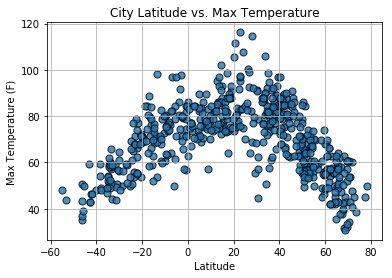

In [29]:
# Create Scatter Plot for Latitude / Temp
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, s=50)
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("CityLatitude_v_MaxTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

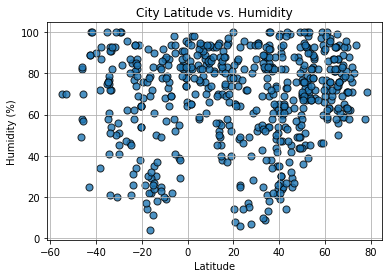

In [30]:
# Create Scatter Plot for Latitude / Humidity
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o",
             edgecolor="black", linewidths=1, alpha=0.8, s=50)
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("CityLatitude_v_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

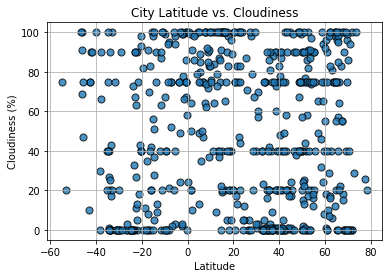

In [31]:
# Create Scatter Plot for Latitude / Cloudiness
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", 
            edgecolor="black", linewidths=1, alpha=0.8, s=50)
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("CityLatitude_v_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

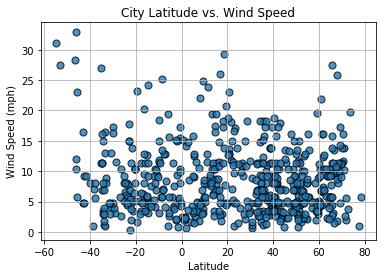

In [32]:
# Create Scatter Plot for Latitude / Windspeed
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o",
             edgecolor="black", linewidths=1, alpha=0.8, s=50)
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("CityLatitude_v_WindSpeed.png")
plt.show()